In [1]:
!gcloud config get-value account

rsa.saraiva94@gmail.com


In [2]:
!gcloud config get-value project

random-stuff-389717


In [8]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "my_service_account.json"

import bigframes.pandas as bpd

REGION = "us" 
PROJECT_ID = "random-stuff-389717"

bpd.options.bigquery.project = PROJECT_ID
bpd.options.bigquery.location = REGION
bpd.options.display.progress_bar = True

query_or_table = "bigquery-public-data.chicago_crime.crime"
df = bpd.read_gbq(query_or_table)

#creating new column for formatted date
df['formatted_date'] = df['date'].dt.strftime('%Y-%m-%d')

#primary type count
df['primary_type'].value_counts().head(10)

/var/folders/kn/n0r40sgs663g90t3f4n_w7hsdh31qw/T/ipykernel_4391/143705451.py:10: UnknownLocationWarning: The location 'us' is set to an unknown value.
  bpd.options.bigquery.location = REGION
/var/folders/kn/n0r40sgs663g90t3f4n_w7hsdh31qw/T/ipykernel_4391/143705451.py:14: UserWarning: Reading cached table from 2024-05-05 20:29:48.261916+00:00 to avoid incompatibilies with previous reads of this table. To read the latest version, set `use_cache=False` or close the current session with Session.close() or bigframes.pandas.close_session().
  df = bpd.read_gbq(query_or_table)


primary_type
THEFT                  1701095
BATTERY                1468537
CRIMINAL DAMAGE         917542
NARCOTICS               753379
ASSAULT                 530632
OTHER OFFENSE           500220
BURGLARY                431880
MOTOR VEHICLE THEFT     402679
DECEPTIVE PRACTICE      363230
ROBBERY                 303501
Name: count, dtype: Int64

<Axes: xlabel='formatted_date'>

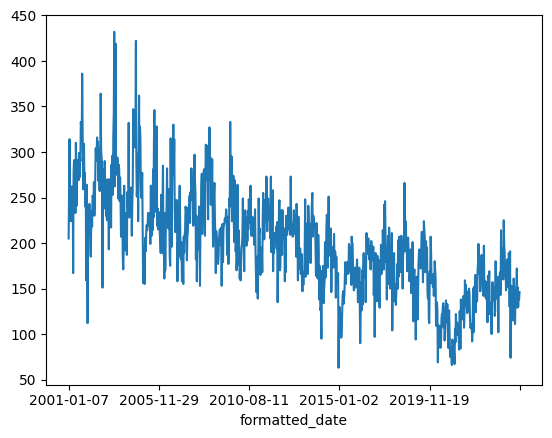

In [9]:
df_theft = df[df['primary_type'] == 'THEFT']
df_theft.groupby(['formatted_date']).count()['unique_key'].plot()

In [10]:
# Create a DataFrame from a BigQuery table
query_or_table = "bigquery-public-data.ml_datasets.penguins"
df = bpd.read_gbq(query_or_table)

# Use the DataFrame just as you would a pandas DataFrame, but calculations
# happen in the BigQuery query engine instead of the local system.
average_body_mass = df["body_mass_g"].mean()
print(f"average_body_mass: {average_body_mass}")

# Create the Linear Regression model
from bigframes.ml.linear_model import LinearRegression

# Filter down to the data we want to analyze
adelie_data = df[df.species == "Adelie Penguin (Pygoscelis adeliae)"]

# Drop the columns we don't care about
adelie_data = adelie_data.drop(columns=["species"])

# Drop rows with nulls to get our training data
training_data = adelie_data.dropna()

# Pick feature columns and label column
X = training_data[
    [
        "island",
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "sex",
    ]
]
y = training_data[["body_mass_g"]]

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
model.score(X, y)

average_body_mass: 4201.754385964914


,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,223.878763,78553.601634,0.005614,181.330911,0.623951,0.623951
